<a href="https://colab.research.google.com/github/daybee09/final-deep-1/blob/main/Planar_data_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
# start your code here
os.chdir('/content/drive/MyDrive/Homework2') #make the directory where this ipynb file is as the current working directory. You will need to change this path to the one that you are working with.
# end your code here

Mounted at /content/drive


## 1 - Packages ##

Let's first import all the packages that you will need during this assignment.
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- [tensorflow](https://www.tensorflow.org/) is a library for deep learning. 
- testCases provides some test examples to assess the correctness of your functions
- planar_utils provide various useful functions used in this assignment

In [ ]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
from planar_utils import load_planar_dataset
import tensorflow as tf

%matplotlib inline

## 2 - Dataset ##

First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables `X` and `Y`.

In [ ]:
X, Y = load_planar_dataset()
X=X.T
Y=Y.T

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

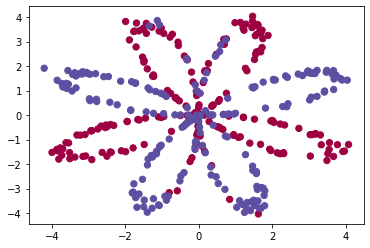

In [ ]:
# Visualize the data:
plt.scatter(X[:,0], X[:,1], c=Y, s=40, cmap=plt.cm.Spectral);

You have:
    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Lets first get a better sense of what our data is like. 

**Exercise**: How many training examples do you have? In addition, what is the `shape` of the variables `X` and `Y`? 

**Hint**: How do you get the shape of a numpy array? [(help)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [ ]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (400, 2)
The shape of Y is: (400, 1)
I have m = 2 training examples!


## 3 - Create Your First Neural Network model with TensorFlow
Assume we are going to build a NN as follows.

![](https://drive.google.com/uc?export=view&id=1GY7lqAdP8EoWfCcz9c0ygfpGBhjfnL6F) 

We are going to introduce two popular ways to build it

### 3.1 - Sequential model ####
```
model_seq = tf.keras.Sequential([
    tf.keras.Input(shape=2), # Input layer: every sample (point) has two inputs
    tf.keras.layers.Dense(4, activation='tanh'), # Hidden layer 1: this layer has 4 neurons, and every neuron use 'tanh' as the activation function
    tf.keras.layers.Dense(1,activation='sigmoid'), # output layer: this layer has 1 neuron, and the activation function is 'sigmoid' 
])

model_seq.summary()
```
**Hint**: 

1. How do you build a sequential model? [(help)](https://www.tensorflow.org/guide/keras/sequential_model)

2. What are the layers in a NN model? [(help)](https://www.tensorflow.org/api_docs/python/tf/keras/layers)

3. What is the Input layer in a NN model? [(help)](https://www.tensorflow.org/api_docs/python/tf/keras/Input)

4. What is the Dense layer in a NN model? [(help)](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

5. Your choices of activation functions. [(help)](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

### 3.2 - API model ####
```
model_API_input = tf.keras.Input(shape=(2)) # Input_layer: every input has shape 2
x = tf.keras.layers.Dense(4, activation='tanh')(model_API_input) # Hidden layer 1: take layer 'model_API_input' as input, have 4 neurons, and use 'tanh' as the activation function
model_API_output = tf.keras.layers.Dense(1,activation='sigmoid')(x) # output layer: take layer 'x' as input, have 1 neuron, and use 'sigmoid' as the activation function

model_API = tf.keras.Model(model_API_input, model_API_output, name="model_API")
model_API.summary()
``` 
**Hint**: 

1. How do you build a API model? [(help)](https://www.tensorflow.org/guide/keras/functional)

**Exercise**: Build your own NN model with either method. 

You can build as many layers as you like. 

For every layer, please feel free to choose the number of neurons. 

Just to make sure that the shape of the input layer matches the size of each sample, and the number of neurons in the output layer matches the size of the output of each sample. 

Please feel free to use 'your_model_name.summary()' to print out the model.

In [ ]:
### START CODE HERE ### 
model_David_input=tf.keras.Input(shape=2)
x=tf.keras.layers.Dense(4,activation='tanh')(model_David_input)
x2=tf.keras.layers.Dense(6,activation='tanh')(x)
model_David_output=tf.keras.layers.Dense(1,activation='sigmoid')(x2)
model_David=tf.keras.Model(model_David_input,model_David_output,name='model_David')
### End CODE HERE ###
model_David.summary()

Model: "model_David"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 dense_4 (Dense)             (None, 6)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


## 4 - Train Your First Neural Network Model
### 4.1 - Compile your model ####

1. how we define our loss?

2. which method to use to find the minimum loss? Sometimes, you may need to specify the 'learning_rate', the step size for every jump. 

3. Which metric to evaluate the model?
```
model_seq.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),  # Optimizer. You may want to try different optimizers to see how they help in this project
    # Loss function to minimize
    loss=tf.keras.losses.BinaryCrossentropy(), # usually used for binary classification problems
    # List of metrics to monitor
    metrics=['accuracy'])
```

**Hint**: 

1. The available optimizers? [(help)](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

2. The available loss functions? [(help)](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

3. The available metric functions? [(help)](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) 

### 4.2 - Train your model ####

We will use 'your_model_name.fit' to train the model. In this function, we have several parameters to tune, shown as below.

```
history = model_seq.fit(
    X, # input data
    Y, # real output data
    batch_size=64, # how many samples (points) do you want to use to update weights once? If you have 640 samples, you can update the weight 10 times for every iteration/epoch
    epochs=10, # how many iterations do you want to train your model? Your data will be reused to train the model for 10 times.
)
```

Please feel free to change the 'batch_size' and the 'epochs' to see how the parameters influence the training process.

**Hint**: 

1. How to train your model? [(help)](https://www.tensorflow.org/guide/keras/train_and_evaluate)

**Exercise**: Compile and train your model.

Please feel free to adjust the parameters in both the 'compile' and the 'fit' function to improve the performance. 

In [ ]:
### START CODE HERE ### 
model_David.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0090),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

history = model_David.fit(X,Y,batch_size=45,epochs=197)
### End CODE HERE ###

Epoch 1/197
9/9 [==============================] - 1s 3ms/step - loss: 0.2257 - accuracy: 0.8950
Epoch 2/197
9/9 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9000
Epoch 3/197
9/9 [==============================] - 0s 3ms/step - loss: 0.2110 - accuracy: 0.9000
Epoch 4/197
9/9 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.8975
Epoch 5/197
9/9 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9050
Epoch 6/197
9/9 [==============================] - 0s 3ms/step - loss: 0.2081 - accuracy: 0.9000
Epoch 7/197
9/9 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9025
Epoch 8/197
9/9 [==============================] - 0s 3ms/step - loss: 0.2109 - accuracy: 0.9025
Epoch 9/197
9/9 [==============================] - 0s 3ms/step - loss: 0.2099 - accuracy: 0.9025
Epoch 10/197
9/9 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9000
Epoch 11/197
9/9 [===========

**Expected output**: You are free to design your own neural network, choose your own optimizer, adjust your 'epochs', 'learning rate', and 'batch_size'. At the end of the epochs, the 'accuracy' should be greater than 0.9

## 4 - Visualize your prediction
We define a function 'plot_boundary_tf(your_model_name, X, y)' to plot the boundary of the trained model. Please change the 'your_model_name' to the name of your model to visualize the result. 

Text(0.5, 1.0, 'Decision Boundary')

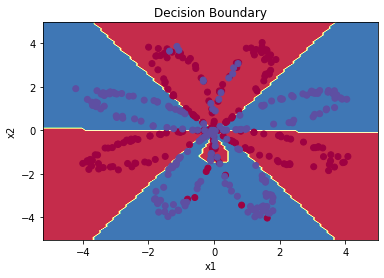

In [ ]:
# Plot the decision boundary
def plot_boundary_tf(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    test_input=np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(test_input)
    Z = Z.reshape(xx.shape)
    Z01 = (Z>0.5)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z01, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    
### START CODE HERE ###   
plot_boundary_tf(model_David, X.T, Y.T) # change the first parameter to be your model name to visualize your model prediction
### END CODE HERE ###
plt.title("Decision Boundary")